# Velib' DataCamp: Solving the bicycle availability issue. 

*Thomas Sergent, Tina Béclin, Maéva Rouault, Lorenzo Gentili, Walid Nasr*

## Introduction

Smoovengo is the new service provider for Paris Velib' services. Keeping/improving customers satisfaction while implementing a new logistic framework is not always straightforward.


Paris Vélib' is faced, on a daily basis, to logistical issues, and has to relocate bicycles constantly during the course of the day.

Indeed, bicycle' stations can only contain a limited number of locations for logistical and economic reasons. Generally, stations which have a greater location experience a huge demand. Consequently, bicycles may be completely unavailable in some locations, whilst parking problems exist for others. 

It would be a huge loss of value for Smoovengo if users decided to use another services to make their daily trips. One important element for a customer is the possibility to use the nearest station to take a bike and make his ride.
In this context, the availability of bicycles at a given station will become Smoovengo daily battle. One solution would be to  anticipate the stations that would need a refill during the day. 


The goal of this project is to develop a prediction model that is able to identify which Velib' station will be full or empty at H+1.

## BUSINESS CASE - Vélib’ stations regulation
 
Vélib' Métropole, formerly Vélib', is a large-scale public bicycle sharing system in Paris, France. Launched on 15 July 2007, the system currently encompasses around 20,000 bicycles and 1,800 bicycle stations, located across Paris and in some surrounding municipalities, with an average daily ridership of 105,000 in 2017.
 
### Problem:
Vélib' stations can only contain a limited number of locations for logistical and economic reasons. Vélib' stations at greater elevations generally experience greater demand. Consequently, bicycles may be completely unavailable in some locations, whilst parking problems exist for others. Vélib' is faced with logistical issues, and is constantly having to relocate bicycles during the course of the day.
 
A Vélib' station must provide these two services:
- ensure there is at least one place available when a customer wants to return a bicycle.
- ensure there is at least one bicycle available when a customer wants to rent a bicycle.
 
To partially solve this situation, Vélib' has set up a regulation system. They have 23 vans with a capacity of 20 bicycles and two buses with a capacity of 62 bicycles; and they move about 3,000 bicycles daily. Regulation trucks ensure the quality of these two services above: a station is visited every 6 hours to balance the number of bicycles per station.
 
But this strategy fails to offset the massive movements of bicycles and the poor distribution of available bicycles is one of the major criticisms of users.
 
To improve its regulation system, Vélib' decided to launch a Big Data project.
The goal is to predict if a station will be empty or full next hour in order to ensure the quality of the two services above. Indeed, using the data at h we will predict if a station is empty of full at hour h+1 (without taking into account if a station is filled in the meantime).
This prediction will allow Vélib’ to be more efficient in the redistribution of the bicycles in the stations knowing which station will be empty/full in an hour, the vans and bus journey will be more efficient on deserving the stations.
 
 
### The Business Case
 
#### 1-) What do we want to predict? How will a good prediction improve a key performance indicator (KPI) or lead to a scientific result?
If I can predict, with high accuracy if a station will be empty or full during the next hour, then I can anticipate the journey of regulation trucks by informing drivers about the priority of each station.
 
Then, I will improve the regulation system and provide a better quality for these two services:
● ensure there is at least one place available when a customer wants to return a bicycle.
● ensure there is at least one bicycle available when a customer wants to rent a bicycle.
This is essential to ensure customer satisfaction and improve the number of packages subscription.
 
The KPIs (Key Performance Indicators) that allow to judge the efficiency of our model are:
● Number of times a station is full
● Average time a station stays full
● Number of times a station is empty
● Average time a station stays empty
● Average time between each truck crossing at a station
● Customer satisfaction rate
● Number of packages subscription
● Transport cost
 
 
#### 2-) Will the predictor be used as decision support, as a part of a fully automated system, or only as part of a report or feasibility study? How will an agent use the system?
We will use a fully automated system which is completely black boxed: data in, decision out.
There is no HCI, no dashboard, only a quantitative prediction which can be then handled some other automatic modules.
● Data in: station_id, name, capacity, numDocksAvailable, numBikesAvailable, is_installed, is_renting, is_returning, lon, lat.
● Data out: for each station: its id and an integer: 0 if the station is empty, 1 if it is not critical, 2 if the station is full.

We considered an empty station if there is less than two bicycles available or less than 10% of the total capacity of the station occupied by bicycles (if numBikesAvailable < min(2, 10% of capacity)) and a full station if there is less than one location available or less than 5% of the total capacity of the station without being occupied by bicycles (if numDocksAvailable <= min(1, 5% of capacity)).
 
 
#### 3-) What should be the quantitative prediction?
Predicting the probability of a station to be empty or full in the next hour is a binary classification problem (will it be empty or not next hour? will it be full or not next hour?). If the time interval is adequate, this information can be chained into an automatic module and can also serve for decision support. It can also be used for limited risk assessment.
 
 
#### 4-) How do we measure the quality or value of the prediction in the selected business or science problem? What will be the quantitative score? How does the quantitative score reflect the quality or value of the prediction? How does the (possibly asymmetric) prediction error convert into cost or decreased KPI?
Binary classification has a wide variety of quality scores. The simplest one is the zero-one error: the prediction is “will be empty”, in reality it is not empty, or vice versa. In the same, the prediction is “will be full”, in reality it is not full, or vice versa. Given the estimated probability of the two types of errors, we can derive the exact loss of different decision scenarios, connecting the quantified score to the KPI.


#### 5-) What data do we need to develop a predictor? Could you find this data? What were the actual data sources? What other sources (private or public) could be exploited? What were and would be the data collection costs?
Here are the data sources which are available at real time, and which are likely to improve the prediction quality:
Vélib’ stations: Station locations
https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/information
Vélib’ stations: Real time availability
https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/information
 
As it is real time, we need to create a historical database from real time data. This new database will be bigger and decision on aggregation should be carefully made.
 
The data collection costs would be very low.
 
To accelerate a lot the development of the data science workflow, it is important to proceed data collection, cleaning, formatting, alignment, augmentation.


 
#### 6-) What data cleaning/tidying steps were required to obtain clean training data?

Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

High-quality data needs to pass a set of quality criterias:
Validity: The degree to which the measures conform to defined business rules or constraints :
Data-Type Constraints : values in a particular column must be of a particular datatype. 
Range Constraints: typically, numbers or dates should fall within a certain range. That is, they have minimum and/or maximum permissible values.
Mandatory Constraints: some columns cannot be empty.

| Nom(identifiant) | Type | Range | Mandatory |
|----------|----------|----------|----------|
|station_id|int | |X|
|name|text|||
|numBikesAvailable | int |takes value 0 or 66 |X|
|is_installed|int|takes value 1 or 0|X|
|is_renting|int|takes value 1 or 0|X|
|numDocksAvailable |int| takes value 0 or 66 |X|
|is_returning|int|takes value 1 or 0|X|
|capacity |int|takes value 0 or 66||
|lon |decimal|takes values between -180 and 180||
|lat|decimal|takes values between -90 and 90||
|xy|geo_point_2d|takes values between -180 and 180,takes values between -90 and 90||



##### Unique Constraints: A field, or a combination of fields, must be unique across a dataset. For example, two persons can’t have the same social security number.
station_id must be unique.
##### Set-Membership constraints: The values for a column come from a set of discrete values or codes. 
Here it is not the case.
##### Foreign-key constraints: This is the more general case of set membership. The set of values in a column is defined in a column of another table that contains unique values. 
Here it is not the case.
##### Regular expression patterns: Occasionally, text fields will have to be validated this way. 
name: XXXXX-XXXXX
##### Cross-field validation: Certain conditions that utilize multiple fields must hold. 
xy: lon,lat

### Accuracy: 
The degree of conformity of a measure to a standard or a true value.
In order to check the name and coordinates of the different velib’ stations we will compare two databases:
Stations Velib: stations location: https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/
Stations Vélib' : Availability in real time:
https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/table/

#### Completeness: 
The degree to which all required measures are known. Incompleteness is almost impossible to fix with data cleansing methodology: one cannot infer facts that were not captured when the data in question was initially recorded.

#### Consistency: 
The degree to which a set of measures are equivalent in across systems.. Inconsistency occurs when two data items in the data set contradict each other.

#### Uniformity: 
The degree to which a set data measures are specified using the same units of measure in all systems. 
Here we will not face any problems of uniformity.


The below process will be used for data cleansing:
##### 1.Data auditing: 
The data is audited to detect anomalies and contradictions: this will allow to get knowledges on the anomalies and their locations. 
##### 2.Workflow specification: 
The detection and removal of anomalies is performed by a sequence of operations on the workflow. In order to achieve a proper workflow, the causes of the anomalies and errors in the data have to be closely considered.
##### 3.Workflow execution
##### 4.Post-processing and controlling: 
After executing the cleansing workflow, the results are inspected to check correctness. Data that could not be corrected during execution of the workflow is manually corrected, if possible. 

We needed to clear some capacity cells as they would appear to be zero. We decided to clean those cells in order to not influence our results. Some stations and coordinates (Latitude and longitude) needed to be updated as they are being relocated, so when displaying the map of the stations we preferred to keep only the one for which we had the exact coordinates. 

#### 7-)How fast the phenomena underlying the prediction problem change? How often the model will have to be retrained? What are the associated costs and risks?
Since its recent change of operator, Velib is currently idling : only 10,000 bike rides per day instead of 60,000. The model will have to be retrained each time a new station opens and each time roadworks may change the flow of cyclists. There is a trade-off between the number of vans and the associated costs, and the quality of service.



## The prediction task


Using data at H-1, we will be able to predict if a station is empty of full at H. 

Trucks redistribute bikes during the day to avoid the fact some stations to become empty or full. Input and output stream of the bikes depend mostly on the place of the station. If the output stream is faster than the input stream, the station will empty. If the input stream is faster than the output stream, the station will get full. 

Even if few techniques are used today to ensure a good distribution of the bikes, the system is far from being perfect, since it's often difficult to find a bike or to find a dock for the bike we are using.

The model we propose will allow Vélib’ to be more efficient in the redistribution of the bicycles in the stations knowing which station will be empty in an hour, the vans and bus journey will be more efficient on deserving the stations.

The data we will manipulate is from https://opendata.paris.fr/page/home/.


## Requirements

    numpy>=1.10.0
    matplotlib>=1.5.0
    pandas>=0.19.0
    scikit-learn>=0.17 

Folium will be installed through the imports, if not previously done. 


## File Description

The dataset is directly imported from the link we specified in the "Prediction task" section (.csv file).This dataset contains informations on several variables. 

Each station is characterized by its id. For each station, the variable numBikesAvailable gives us the number of bikes available since the number of Docks available is given by the variable numDocksAvailable. T
The capacity is obtained by summing the number of bikes available and the number of docks available for each station. 

Each station location is given by its longitude and its lattitude thanks to the variables lon and lat. 

A station is said non functioning if its number of bikes available or its number of dock availble isn't different from 0. And even with a number different from 0, this number must be a minimum high so the station can be fully operational.

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
!{sys.executable} -m pip install folium

import folium
from folium.plugins import MarkerCluster

    100% |████████████████████████████████| 81kB 751kB/s ta 0:00:01
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /Users/thomassergent/Library/Caches/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium


## Exploratory data analysis

### Loading the data

In [5]:
data = pd.read_csv("data/train_17h.csv", sep=';')
data = data.fillna('')
data


,station_id,name,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning,capacity,lon,lat,xy
0,27415736,,0,1,1,0,1,,,,
1,27415256,,1,1,1,32,1,,,,
2,27415150,,0,1,1,0,1,,,,
3,39254792,,0,1,1,51,1,,,,
4,7247,Charonne - Pierre Bayle,4,1,1,19,1,23,2.3904,48.8584,"48.8584450543, 2.39039812239"
5,27363489,,3,1,1,24,1,,,,
6,15462861,Crevaux - Bugeaud,4,1,1,27,1,31,2.28115,48.8708,"48.8708094287, 2.28114900769"
7,27414527,,3,1,1,17,1,,,,
8,37647,,18,1,1,12,1,,,,
9,7254,Gay Lussac - Saint-Jacques,5,1,1,19,1,24,2.34192,48.8447,"48.8447302561, 2.34192394487"


This dataset is composed of 225 rows and 13 columns. 

We can notice that is_installed and is_renting are always equal to 1 which indicates that there is not any misfunction in our system. Morover, we added some variables Is_Full representing the percentage of fullness of a station and its Quartiles. 


In [6]:
data.dtypes

station_id            int64
name                 object
numBikesAvailable     int64
is_installed          int64
is_renting            int64
numDocksAvailable     int64
is_returning          int64
capacity             object
lon                  object
lat                  object
xy                   object
dtype: object

In [10]:
def status(numDocksAvailable, numBikesAvailable, capacity): #this is what we want to predict
    if numBikesAvailable <= min(2, capacity / 10):
        return 0 #almost empty station
    elif numDocksAvailable <= min(1, capacity / 20):
        return 2 #almost full station
    else:
        return 1
data['status'] = data.apply(lambda x: status(x['numDocksAvailable'], x['numBikesAvailable'], x['capacity']), axis=1)

/Users/thomassergent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
data['capacity'] = data['numBikesAvailable'] + data['numDocksAvailable'] #complete the capacity of each station
data = data[data['capacity'] != 0] #removal of station with capacity listed as 0

/Users/thomassergent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data

,station_id,name,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning,capacity,lon,lat,xy,status
1,27415256,,1,1,1,32,1,33,,,,0
3,39254792,,0,1,1,51,1,51,,,,0
4,7247,Charonne - Pierre Bayle,4,1,1,19,1,23,2.3904,48.8584,"48.8584450543, 2.39039812239",1
5,27363489,,3,1,1,24,1,27,,,,1
6,15462861,Crevaux - Bugeaud,4,1,1,27,1,31,2.28115,48.8708,"48.8708094287, 2.28114900769",1
7,27414527,,3,1,1,17,1,20,,,,1
8,37647,,18,1,1,12,1,30,,,,1
9,7254,Gay Lussac - Saint-Jacques,5,1,1,19,1,24,2.34192,48.8447,"48.8447302561, 2.34192394487",1
10,15163771,George Sand-Jean De La Fontaine,5,1,1,26,1,31,2.26826,48.8499,"48.8498691876, 2.26825738753",1
11,15212034,,4,1,1,17,1,21,,,,1


In [17]:
data.describe()

,station_id,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning,capacity,status
count,2.010000e+02,201.000000,201.0,201.0,201.000000,201.0,201.000000,201.000000
mean,2.068308e+07,4.880597,1.0,1.0,23.253731,1.0,28.134328,0.706468
std,1.396580e+07,4.989556,0.0,0.0,9.969468,0.0,9.850729,0.456517
min,6.245000e+03,0.000000,1.0,1.0,4.000000,1.0,12.000000,0.000000
25%,1.137574e+07,2.000000,1.0,1.0,17.000000,1.0,21.000000,0.000000
50%,2.736310e+07,4.000000,1.0,1.0,21.000000,1.0,26.000000,1.000000
75%,2.823301e+07,6.000000,1.0,1.0,29.000000,1.0,34.000000,1.000000
max,3.988763e+07,47.000000,1.0,1.0,60.000000,1.0,66.000000,1.000000


In [18]:
data.count()

station_id           201
name                 201
numBikesAvailable    201
is_installed         201
is_renting           201
numDocksAvailable    201
is_returning         201
capacity             201
lon                  201
lat                  201
xy                   201
status               201
dtype: int64

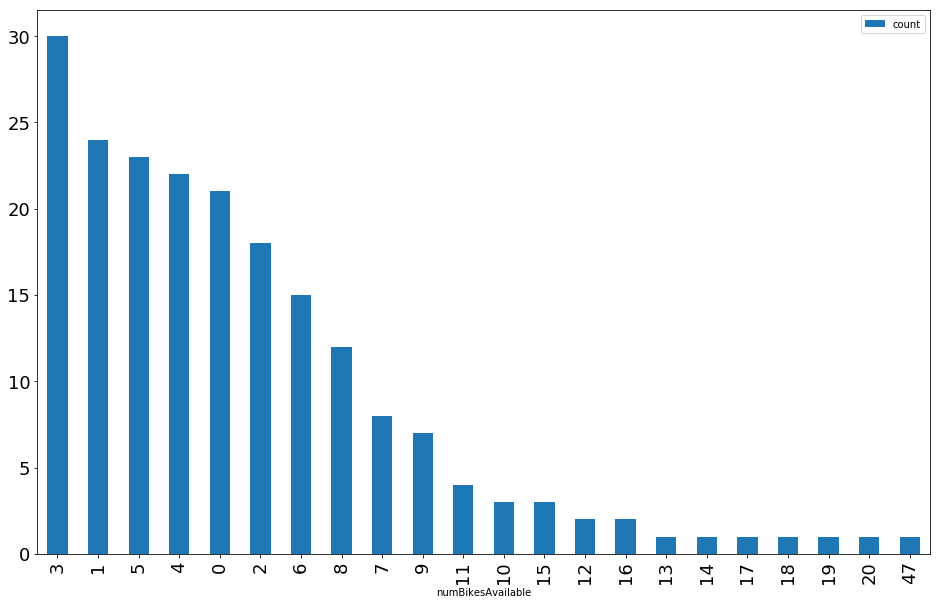

In [19]:
data.groupby('numBikesAvailable').count()[['station_id']].sort_values(
    'station_id', ascending=False).reset_index().rename(
    columns={'station_id': 'count'}).plot.bar(
    x='numBikesAvailable', y='count', figsize=(16, 10), fontsize=18);

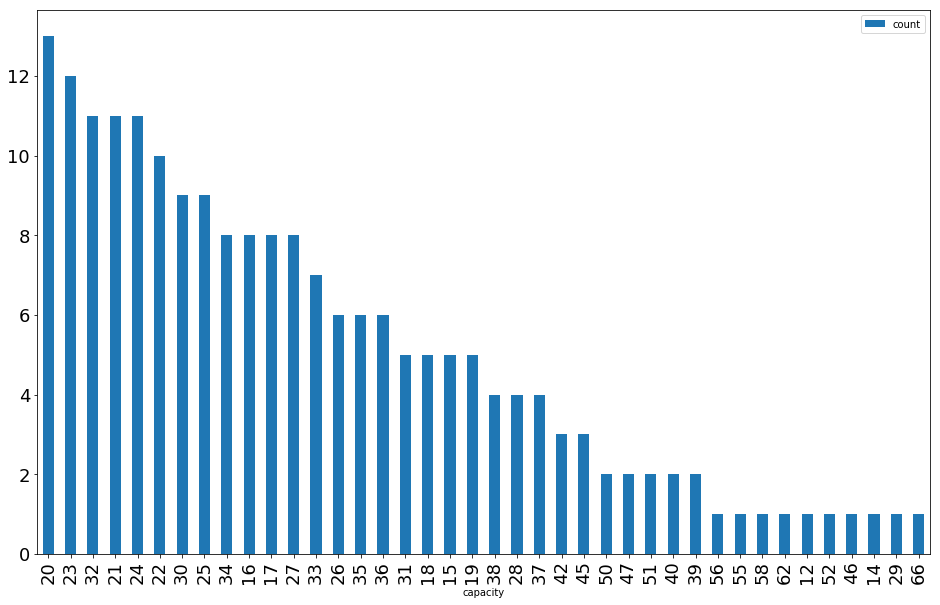

In [20]:
Nda=data.groupby('capacity').count()[['station_id']].sort_values(
    'station_id', ascending=False).reset_index().rename(
    columns={'station_id': 'count'}).plot.bar(
    x='capacity', y='count', figsize=(16, 10), fontsize=18);

In [21]:
print(np.unique(data['name']))
print(len(np.unique(data['name'])))


['' 'Alexander Fleming - Belv\xc3\xa9d\xc3\xa8re'
 'Arsonval Falgui\xc3\xa8re' 'Assas - Luxembourg' 'Assas - Rennes'
 'Ath\xc3\xa8nes - Clichy' 'Bassano -  I\xc3\xa9na'
 'Belleville -  Pr\xc3\xa9 Saint-Gervais' 'Bruant-Vincent Auriol'
 'Charenton - Jardiniers' 'Charonne - Pierre Bayle' 'Chernoviz - Raynouard'
 'Chevreuse - Montparnasse' 'Choron - Martyrs' 'Colonel Monteil - Brune'
 'Colonel Pierre Avia' 'Crevaux - Bugeaud' 'Cujas - Saint-Michel'
 'Duhamel - Andr\xc3\xa9 Gide' "Eglise d'Auteuil" 'Favart - Italiens'
 'Flandrin - Longchamp' 'Galil\xc3\xa9e - Kl\xc3\xa9ber'
 'Gare du Nord - Saint-Vincent de Paul' 'Gay Lussac - Saint-Jacques'
 'Geoffroy-Saint-Hilaire - Saint-Marcel' 'George Sand-Jean De La Fontaine'
 'Goubet - Darius Milhaud' 'Gouthi\xc3\xa8re - Poterne des Peupliers'
 'Grands Moulins de Pantin' 'Hauteville - Bonne Nouvelle'
 'Hautpoul - Jean Jaur\xc3\xa8s' 'Institut de France'
 'Jean-Baptiste Pigalle - La Bruyere' 'Jules Vall\xc3\xa8s - Charonne'
 'La Motte-Picquet Grenell

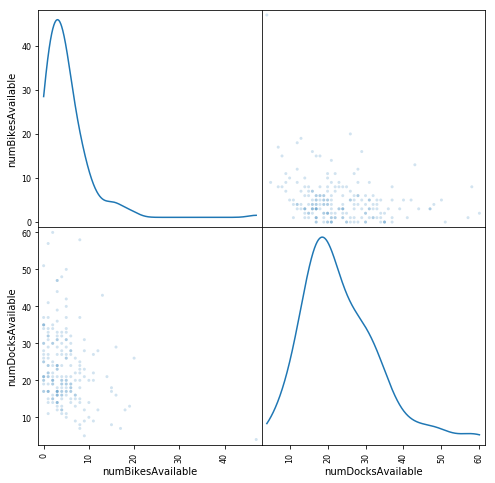

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.get(['numBikesAvailable', 'numDocksAvailable','name']), alpha=0.2,figsize=(8, 8), diagonal='kde');


## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files:   
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features). 
* a class `Classifier` to predict 

### Feature extraction

The feature extractor implements a `transform` function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the classification.  

**Note:** the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

In [24]:
%%file submissions/starting_kit/feature_extractor.py
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import string

class FeatureExtractor:

    def fit(self, X_df, y=None):
        """
        ----------
        X_df : pandas.DataFrame
        """
        data['capacity'] = data['numBikesAvailable'] + data['numDocksAvailable'] #complete the capacity of each station
        data = data[data['capacity'] != 0] #removal of station with capacity listed as 0
        X_df = X_df.fillna(0)
        return self

    def fit_transform(self, X_df, y=None):
        return self.fit(X_df).transform(X_df)

    def transform(self, X_df):
        return X

Overwriting submissions/starting_kit/feature_extractor.py


## Classifier

The classifier follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/edit/submissions/starting_kit/classifier.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf` in `__init__`, then calls its `fit` and `predict_proba` functions in the corresponding member functions.

In [26]:
%%file submissions/starting_kit/classifier.py
# -*- coding: utf-8 -*-
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier()

    def fit(self, X, y):
        self.clf.fit(X.todense(), y)

    def predict(self, X):
        return self.clf.predict(X.todense())

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

Overwriting submissions/starting_kit/classifier.py


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `classifier.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.